In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [3]:
df= pd.read_csv("Iris (1).csv")

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df=df.iloc[:,1:]

In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
encoder=LabelEncoder()

In [10]:
df["Species"]=encoder.fit_transform(df['Species'])

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df=df[df['Species'] !=0][['SepalWidthCm','PetalLengthCm','Species']]

In [13]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


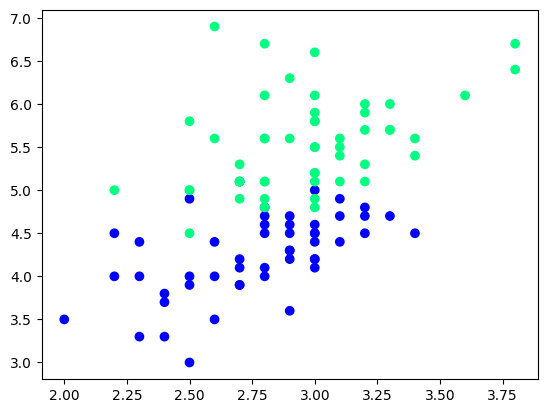

In [14]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [15]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
101,2.7,5.1,2
50,3.2,4.7,1
59,2.7,3.9,1
84,3.0,4.5,1
81,2.4,3.7,1
58,2.9,4.6,1
71,2.8,4.0,1
94,2.7,4.2,1
109,3.6,6.1,2


In [16]:
#Taking only 10 rows for training
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [17]:
df_train

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
119,2.2,5.0,2
95,3.0,4.2,1
64,2.9,3.6,1
114,2.8,5.1,2
82,2.7,3.9,1
134,2.6,5.6,2
63,2.9,4.7,1
125,3.2,6.0,2
93,2.3,3.3,1


In [18]:
df_val

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
94,2.7,4.2,1
81,2.4,3.7,1
77,3.0,5.0,1
97,2.9,4.3,1


In [19]:
df_test

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
66,3.0,4.5,1
127,3.0,4.9,2
59,2.7,3.9,1
136,3.4,5.6,2


In [20]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [21]:
y_test

array([1, 1, 1, 1, 1])

# CASE 1- BAGGING

In [22]:
#Data for tree 1
df_bag = df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
95,3.0,4.2,1
93,2.3,3.3,1
82,2.7,3.9,1
60,2.0,3.5,1
125,3.2,6.0,2
114,2.8,5.1,2
63,2.9,4.7,1


In [24]:
dt_bag1 = DecisionTreeClassifier()

In [26]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

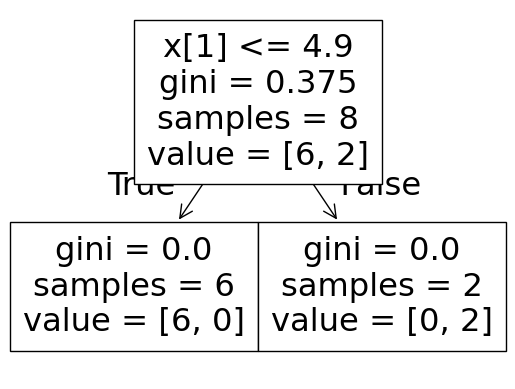

0.8


/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


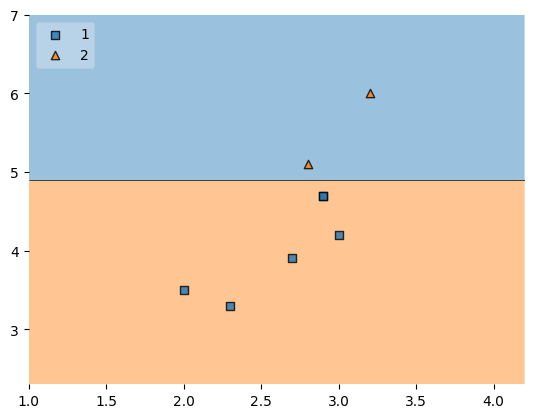

In [27]:
evaluate(dt_bag1,X,y)

In [28]:
#Data fro tree1
df_bag=df_train.sample(8,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
60,2.0,3.5,1
93,2.3,3.3,1
82,2.7,3.9,1
119,2.2,5.0,2
125,3.2,6.0,2
64,2.9,3.6,1
82,2.7,3.9,1


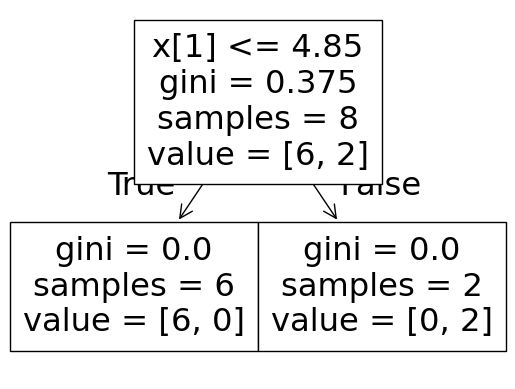

0.8


/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


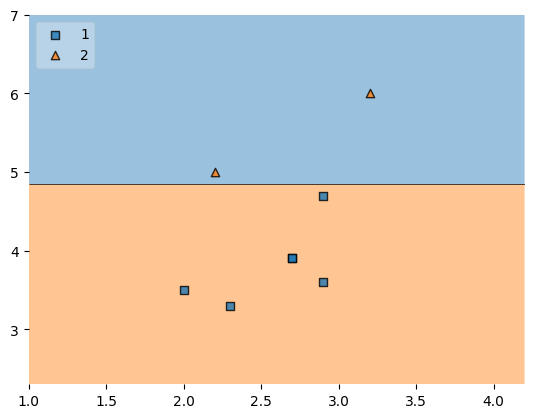

In [29]:
dt_bag2=DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [30]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
119,2.2,5.0,2
82,2.7,3.9,1
95,3.0,4.2,1
114,2.8,5.1,2
95,3.0,4.2,1
95,3.0,4.2,1
64,2.9,3.6,1
93,2.3,3.3,1


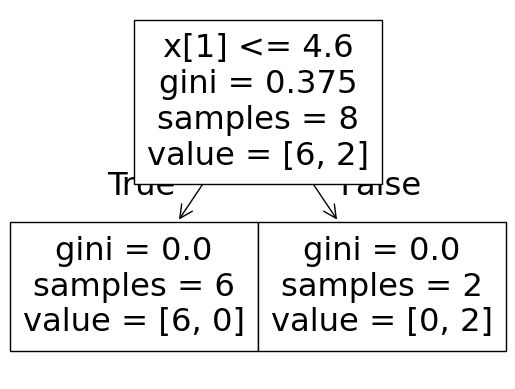

0.8


/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


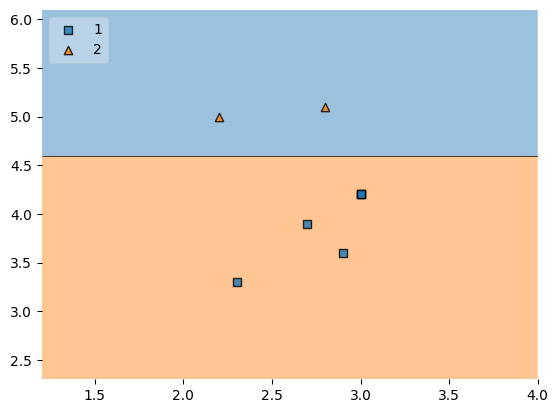

In [31]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [32]:
df_test

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
66,3.0,4.5,1
127,3.0,4.9,2
59,2.7,3.9,1
136,3.4,5.6,2


In [35]:
print("Predictor 1",dt_bag1.predict(np.array([3.6,6.1]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.6,6.1]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.6,6.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
print("Predictor 1",dt_bag1.predict(np.array([3.4,5.6]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.4,5.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.4,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,4.5]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,4.5]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,4.5]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gaurikutakole/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [38]:
#Row sampling wihtout replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
119,2.2,5.0,2
95,3.0,4.2,1
64,2.9,3.6,1
114,2.8,5.1,2
82,2.7,3.9,1
134,2.6,5.6,2
63,2.9,4.7,1
125,3.2,6.0,2
93,2.3,3.3,1


In [39]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
93,2.3,3.3,1
125,3.2,6.0,2
114,2.8,5.1,2
60,2.0,3.5,1
63,2.9,4.7,1
64,2.9,3.6,1
119,2.2,5.0,2


# Random Subspaces

In [41]:
df1 = pd.read_csv("Iris (1).csv")
df1=df1.sample(10)

In [42]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
43,44,5.0,3.5,1.6,0.6,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,Iris-versicolor


In [43]:
df1.sample(2,replace=True,axis=1)

,PetalLengthCm,PetalWidthCm
43,1.6,0.6
110,5.1,2.0
19,1.5,0.3
48,1.5,0.2
108,5.8,1.8
117,6.7,2.2
15,1.5,0.4
54,4.6,1.5
58,4.6,1.3
82,3.9,1.2


# Random Patches

In [44]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
43,44,5.0,3.5,1.6,0.6,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,Iris-versicolor


In [45]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,SepalWidthCm
19,Iris-setosa,3.8
108,Iris-virginica,2.5
43,Iris-setosa,3.5
117,Iris-virginica,3.8
117,Iris-virginica,3.8
19,Iris-setosa,3.8
110,Iris-virginica,3.2
110,Iris-virginica,3.2
